In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB

In [ ]:
# Load NLP Pkg
import flair

In [ ]:
# Methods/Attrib
dir(flair)

['Path',
 '__all__',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_arrow',
 'cache_root',
 'data',
 'datasets',
 'device',
 'device_id',
 'embeddings',
 'file_utils',
 'hf_set_seed',
 'logger',
 'logging',
 'models',
 'nn',
 'optim',
 'os',
 'samplers',
 'set_proxies',
 'set_seed',
 'splitter',
 'tokenization',
 'torch',
 'trainers',
 'training_utils',
 'visual']

In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/train_drcat_04.csv')
df

,essay_id,text,class,source,prompt,fold,label
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1,fake
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2,real
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5,real
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8,real
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0,fake
...,...,...,...,...,...,...,...
44201,F7341069C4A4,"""Oh man I didn't make the soccer team!"", yelle...",0,persuade_corpus,NaN,7,real
44202,AFE6E553DAC2,I believe that using this technology could be ...,0,persuade_corpus,NaN,8,real
44203,falcon_180b_v1_600,The Face on Mars is a fascinating phenomenon t...,1,falcon_180b_v1,You have read the article 'Unmasking the Face ...,3,fake
44204,A5F84C104693,Texting & Driving\n\nUsing your phone while dr...,0,persuade_corpus,NaN,1,real


In [ ]:
df.head()

,essay_id,text,class,source,prompt,fold,label
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1,fake
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2,real
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5,real
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8,real
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0,fake


In [ ]:
# Check for value count
df['class'].value_counts()

0    29792
1    14414
Name: class, dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='class', ylabel='count'>

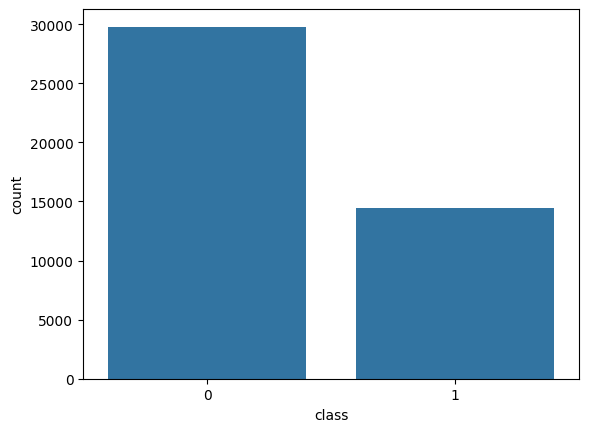

In [ ]:
sns.countplot(x='class', data=df)

In [ ]:
# Preparing Dataset
# Using CSV
df.head()

,essay_id,text,class,source,prompt,fold,label
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1,fake
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2,real
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5,real
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8,real
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0,fake


In [ ]:
df.columns

Index(['essay_id', 'text', 'class', 'source', 'prompt', 'fold', 'label'], dtype='object')

In [ ]:
df1 = df[['text','label']]

In [ ]:
# Rename Columns
df1.columns  = ['text','labels']

In [ ]:
df1

,text,labels
0,"In recent years, technology has had a profoun...",fake
1,Should students participate in an extracurricu...,real
2,The electoral college is a symbol of mockery a...,real
3,This is why I think the principle should allow...,real
4,I strongly believe that meditation and mindful...,fake
...,...,...
44201,"""Oh man I didn't make the soccer team!"", yelle...",real
44202,I believe that using this technology could be ...,real
44203,The Face on Mars is a fascinating phenomenon t...,fake
44204,Texting & Driving\n\nUsing your phone while dr...,real


In [ ]:
# Prepare for FastText Format
#__label__ <class> <text>
df1.head()

,text,labels
0,"In recent years, technology has had a profoun...",fake
1,Should students participate in an extracurricu...,real
2,The electoral college is a symbol of mockery a...,real
3,This is why I think the principle should allow...,real
4,I strongly believe that meditation and mindful...,fake


In [ ]:
# For FastText
df_fst = df1.copy()

In [ ]:
df_fst.head()

,text,labels
0,"In recent years, technology has had a profoun...",fake
1,Should students participate in an extracurricu...,real
2,The electoral college is a symbol of mockery a...,real
3,This is why I think the principle should allow...,real
4,I strongly believe that meditation and mindful...,fake


In [ ]:
'__label__' + df_fst['labels'].astype(str)

0        __label__fake
1        __label__real
2        __label__real
3        __label__real
4        __label__fake
             ...      
44201    __label__real
44202    __label__real
44203    __label__fake
44204    __label__real
44205    __label__real
Name: labels, Length: 44206, dtype: object

In [ ]:
df_fst['labels'] = '__label__' + df_fst['labels'].astype(str)

In [ ]:
df_fst = df_fst[['labels','text']]

In [ ]:
### Spliting Dataset into 3
### train,test,dev.csv
#### 60,20,20

# Using Numpy
train,test,dev = np.split(df1,[int(.6*len(df1)),int(.8*len(df1))])

In [ ]:
print(df1.shape)
print(train.shape)
print(test.shape)
print(dev.shape)

(44206, 2)
(26523, 2)
(8841, 2)
(8842, 2)


In [ ]:
# Create A Folder for the csv
!mkdir -p data

In [ ]:
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
dev.to_csv("data/dev.csv")

In [ ]:
!ls data

dev.csv  test.csv  train.csv


In [ ]:
df_fst

,labels,text
0,__label__fake,"In recent years, technology has had a profoun..."
1,__label__real,Should students participate in an extracurricu...
2,__label__real,The electoral college is a symbol of mockery a...
3,__label__real,This is why I think the principle should allow...
4,__label__fake,I strongly believe that meditation and mindful...
...,...,...
44201,__label__real,"""Oh man I didn't make the soccer team!"", yelle..."
44202,__label__real,I believe that using this technology could be ...
44203,__label__fake,The Face on Mars is a fascinating phenomenon t...
44204,__label__real,Texting & Driving\n\nUsing your phone while dr...


In [ ]:
# Spliting FastText Format Dataset into 3
# Using Numpy
train_fst,test_fst,dev_fst = np.split(df_fst,[int(.6*len(df_fst)),int(.8*len(df_fst))])

In [ ]:
# Store in a  folder
!mkdir -p data_fst

In [ ]:
train_fst.to_csv("data_fst/train.csv",sep='\t',index=False,header=False)
test_fst.to_csv("data_fst/test.csv",sep='\t',index=False,header=False)
dev_fst.to_csv("data_fst/dev.csv",sep='\t',index=False,header=False)

In [ ]:
!ls data_fst

dev.csv  test.csv  train.csv


In [ ]:
### Building our Corpus
# CSVClassificationCorpus
# ClassificationCorpus

from flair.datasets import ClassificationCorpus,CSVClassificationCorpus
from flair.data import Corpus

In [ ]:
# For CSV
df1.columns

Index(['text', 'labels'], dtype='object')

In [ ]:
# Create Column Mapping to show which column is for label and text
column_name_map = {2:"label_topic",1:"text"}

In [ ]:
# Location for CSV
data_folder = 'data/'

In [ ]:
# Create Corpus For CSV
corpus_csv: Corpus = CSVClassificationCorpus(data_folder, column_name_map=column_name_map, skip_header=True, delimiter=',', label_type='class')

2024-03-26 17:21:44,232 Reading data from data
2024-03-26 17:21:44,235 Train: data/train.csv
2024-03-26 17:21:44,236 Dev: data/dev.csv
2024-03-26 17:21:44,237 Test: data/test.csv


In [ ]:
# Method 2 Using FastText Format
data_folder_fst = 'data_fst/'

In [ ]:
corpus_fst: Corpus = ClassificationCorpus(data_folder_fst)

2024-03-26 17:21:45,492 Reading data from data_fst
2024-03-26 17:21:45,494 Train: data_fst/train.csv
2024-03-26 17:21:45,496 Dev: data_fst/dev.csv
2024-03-26 17:21:45,498 Test: data_fst/test.csv
2024-03-26 17:21:52,917 Initialized corpus data_fst/ (label type name is 'class')


In [ ]:
# Creating the Label Diction For CSV
label_dict_csv = corpus_csv.make_label_dictionary(label_type='class')

2024-03-26 17:21:52,925 Computing label dictionary. Progress:


0it [00:00, ?it/s]
26523it [03:52, 114.01it/s]

2024-03-26 17:25:45,627 Dictionary created for label 'class' with 2 values: real (seen 17781 times), fake (seen 8742 times)


In [ ]:
# Creating the Label Diction For FastText
label_dict_fst = corpus_fst.make_label_dictionary(label_type='class')

2024-03-26 17:25:45,637 Computing label dictionary. Progress:


0it [00:00, ?it/s]
26523it [00:34, 762.74it/s]

2024-03-26 17:26:20,430 Dictionary created for label 'class' with 2 values: real (seen 17781 times), fake (seen 8742 times)


In [ ]:
# Working with the Word Embeddings
from flair.embeddings import FlairEmbeddings,WordEmbeddings,StackedEmbeddings,DocumentLSTMEmbeddings,DocumentRNNEmbeddings

In [ ]:
# Create our WEmbeddings
word_embeddings = [FlairEmbeddings('news-forward-fast'),FlairEmbeddings('news-backward-fast')]

2024-03-26 17:26:21,920 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-forward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmppaiht9r9


100%|██████████| 18.8M/18.8M [00:03<00:00, 6.55MB/s]

2024-03-26 17:26:25,928 copying /tmp/tmppaiht9r9 to cache at /root/.flair/embeddings/lm-news-english-forward-1024-v0.2rc.pt
2024-03-26 17:26:25,950 removing temp file /tmp/tmppaiht9r9


2024-03-26 17:26:28,191 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-backward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmp9ycsy77g


100%|██████████| 18.8M/18.8M [00:02<00:00, 6.89MB/s]

2024-03-26 17:26:32,048 copying /tmp/tmp9ycsy77g to cache at /root/.flair/embeddings/lm-news-english-backward-1024-v0.2rc.pt
2024-03-26 17:26:32,073 removing temp file /tmp/tmp9ycsy77g


In [ ]:
# Document Embeddings
document_embeddings = DocumentRNNEmbeddings(word_embeddings,hidden_size=512,reproject_words=True,reproject_words_dimension=256)

Build & Training

In [ ]:
# Load NLP Pkgs
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [ ]:
# Classifier with CSV dataset
clf = TextClassifier(document_embeddings, label_type='class', label_dictionary=label_dict_csv)

In [ ]:
# Classifier with FastText Format
clf2 = TextClassifier(document_embeddings, label_type='class', label_dictionary=label_dict_fst)

In [ ]:
# Training
# Init
trainer = ModelTrainer(clf2, corpus_fst)

In [ ]:
# Training
# Init
### trainer = ModelTrainer(clf, corpus_csv)

In [ ]:
# Fit/Training with Dataset
trainer.train('data_fst/', max_epochs=2)

2024-03-26 17:26:32,205 ----------------------------------------------------------------------------------------------------
2024-03-26 17:26:32,208 Model: "TextClassifier(
  (embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
        )
      )
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2048, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (locked_dropout): LockedDropout(p=0

In [ ]:
# Making Prediciton
# Load Saved Model and Predict
new_clf = TextClassifier.load('data_fst/best-model.pt')

In [ ]:
from flair.data import Sentence

In [ ]:
# Sample Sentence
ex1 = Sentence("That girl is a bitch")
ex2 = Sentence("This is a good material")

In [ ]:
# Apply our model
new_clf.predict(ex1)

In [ ]:
ex1.labels

In [ ]:
new_clf.predict(ex2)

In [ ]:
ex2.labels

In [ ]:
# Plot Loss Curve
from flair.visual.training_curves import Plotter

In [ ]:
plotter = Plotter()
plotter.plot_training_curves('data_fst/loss.tsv')
plotter.plot_weights('data_fst/weights.txt')